# Assignment 2 (10 Marks)

Please submit this file only.

Name:

Student ID:  

## Question 1

Please use this same dataset as in Assignment 1 for the following plot:

Visualize the time series for Regular Unleaded Gasoline prices in Ottawa from 2000 to 2023. Smooth the time series using a simple moving average with a window size of 40. Plot both the original time series and its trend in one plot.

Your visualization should be complete.

In [ ]:
import pandas as pd

df = pd.read_csv('data/energy-price.csv')

<ipython-input-2-9c01bd77d5a3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])


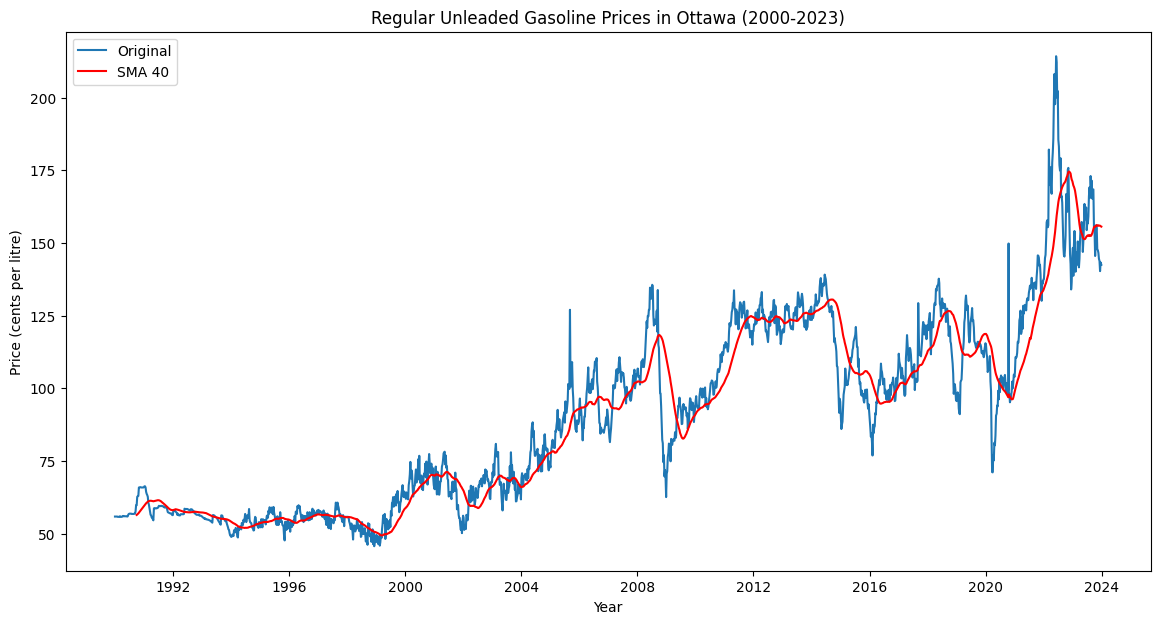

In [ ]:
# write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for Regular Unleaded Gasoline
df_filtered = df[df['Fuel Type'] == 'Regular Unleaded Gasoline']

# Convert the 'Date' column to datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Ensure the data is sorted by date
df_filtered = df_filtered.sort_values('Date')
df_filtered['Ottawa'] = pd.to_numeric(df_filtered['Ottawa'], errors='coerce')

# Calculate the Simple Moving Average (SMA) with a window of 40
df_filtered['SMA_40'] = df_filtered['Ottawa'].rolling(window=40).mean()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Date'], df_filtered['Ottawa'], label='Original')
plt.plot(df_filtered['Date'], df_filtered['SMA_40'], label='SMA 40', color='red')
plt.title('Regular Unleaded Gasoline Prices in Ottawa (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Price (cents per litre)')
plt.legend()
plt.show()


## Question 2

Please plot a map of Canada showing the volcanoes and earthquakes, with the earthquakes' magnitude represented by color. Your visualization should be complete.

Data sources:
https://github.com/plotly/datasets/blob/master/volcano_db.csv
https://earthquakescanada.nrcan.gc.ca/stndon/NEDB-BNDS/bulletin-en.php

In [ ]:
import pandas as pd
import geopandas

volcano = pd.read_csv('data/volcano_db.csv', encoding = "ISO-8859-1")
# World map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# Earthquakes in Canada
earthquake = pd.read_csv('data/earthquake.txt',sep='|')

<ipython-input-7-db6f553f9ac3>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<ipython-input-10-b7f6e15280cc>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


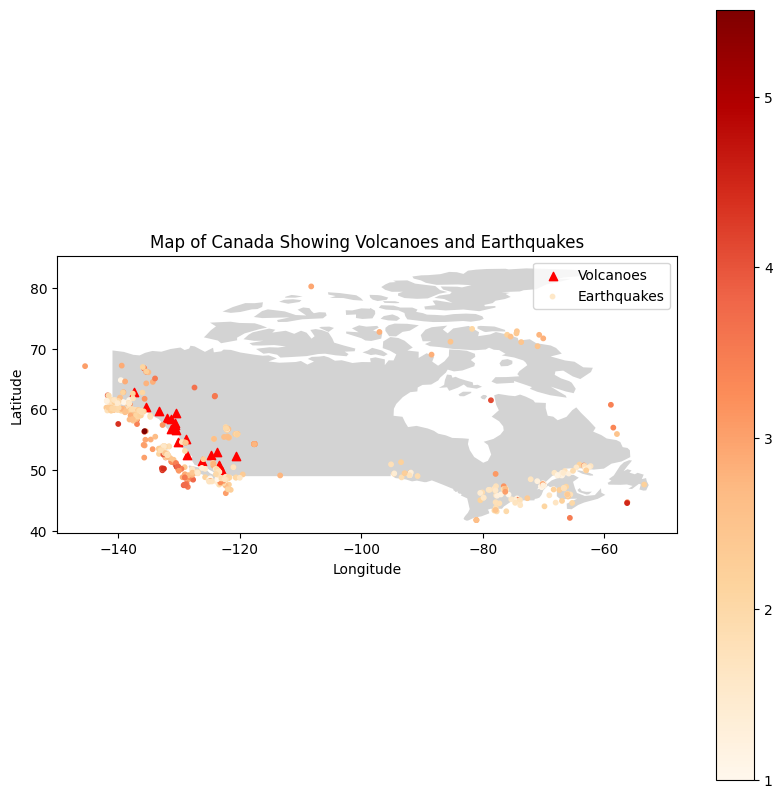

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the volcano data
volcano = pd.read_csv('data/volcano_db.csv', encoding="ISO-8859-1")

# Filter for volcanoes in Canada
volcano_canada = volcano[volcano['Country'] == 'Canada']

# Load world map using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for the map of Canada
canada = world[world['name'] == 'Canada']

earthquake = pd.read_csv('earthquake.txt', sep='|')

# Convert latitude and longitude to a GeoDataFrame for both volcanoes and earthquakes
gdf_volcanoes = gpd.GeoDataFrame(volcano_canada, geometry=gpd.points_from_xy(volcano_canada.Longitude, volcano_canada.Latitude))
gdf_earthquakes = gpd.GeoDataFrame(earthquake, geometry=gpd.points_from_xy(earthquake.Longitude, earthquake.Latitude))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot Canada
canada.plot(ax=ax, color='lightgrey')

# Plot volcanoes
gdf_volcanoes.plot(ax=ax, color='red', marker='^', label='Volcanoes')

# Plot earthquakes, using color to represent magnitude
gdf_earthquakes.plot(ax=ax, column='Magnitude', cmap='OrRd', legend=True, label='Earthquakes', markersize=10)

# Customizations
plt.title('Map of Canada Showing Volcanoes and Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()
